51
100
105
256


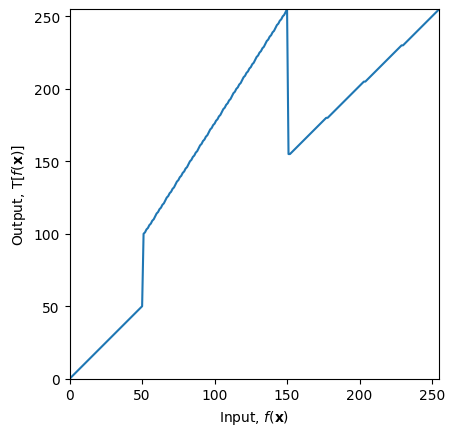

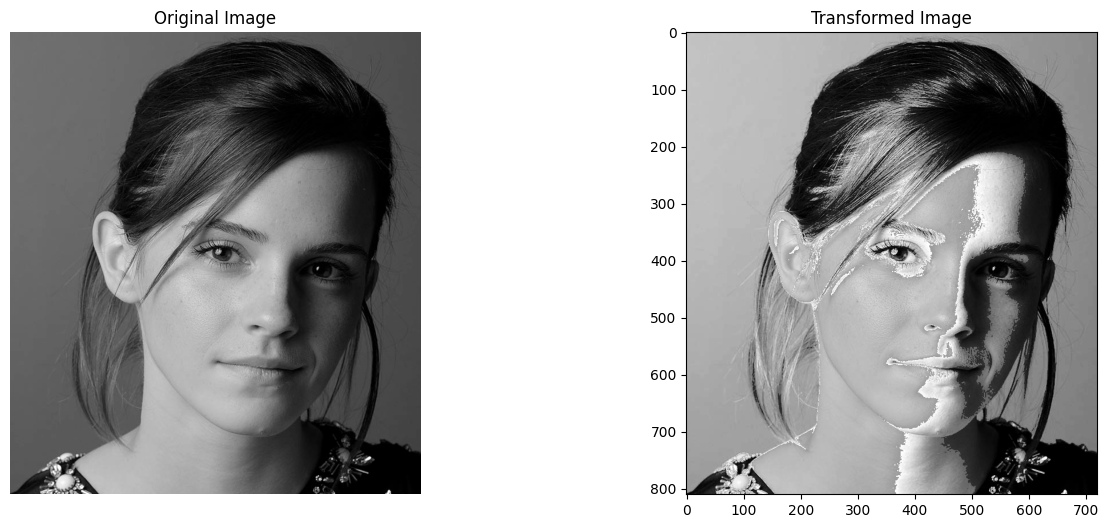

In [3]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


t1 = np.linspace(0, 50, 51).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, 100).astype('uint8')
print(len(t2))
t3 = np.linspace(155, 255, 105).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


f = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
t = np.arange(256, dtype=np.uint8)
g = transform[f]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
for a in ax[0:1]:
    a.axis('off')

plt.show()

181
75
256
181
75
75
256


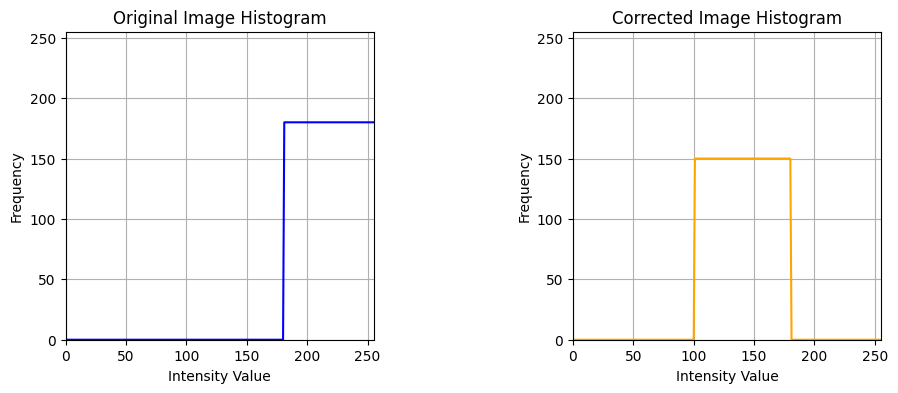

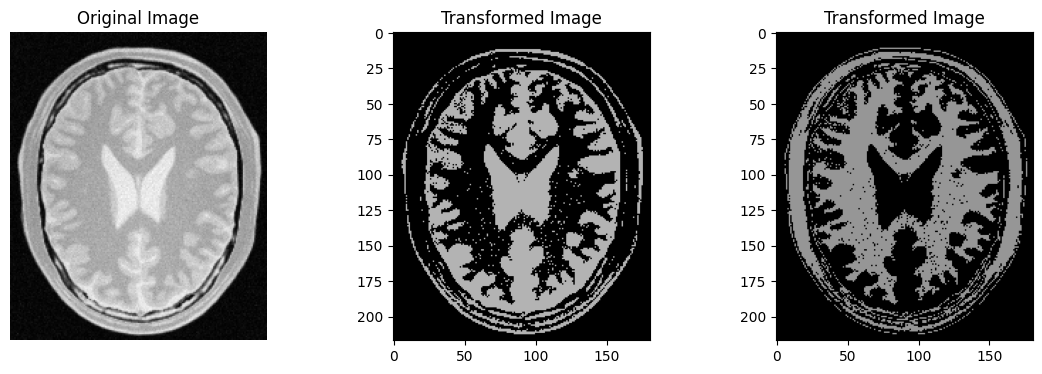

In [ ]:
#accenuating white matter
t1 = np.linspace(0, 0, 181).astype('uint8')
print(len(t1))
t2 = np.linspace(180, 180, 75).astype('uint8')
print(len(t2))
 
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(transform1))

#accenuating grey matter
t3 = np.linspace(0, 0, 101).astype('uint8')
print(len(t1))
t4 = np.linspace(150, 150, 80).astype('uint8')
print(len(t2))
t5 = np.linspace(0, 0, 75).astype('uint8')
print(len(t2))

 
transform2 = np.concatenate((t3, t4, t5), axis=0).astype('uint8')
print(len(transform2))


fig, ax2 = plt.subplots(1, 2, figsize=(12, 4))
ax2[0].plot(transform1, label='Transform 1', color='blue')
ax2[0].set_title('Original Image Histogram')
ax2[0].set_xlabel('Intensity Value')
ax2[0].set_ylabel('Frequency')
ax2[1].plot(transform2, label='Transform 2', color='orange')
ax2[1].set_title('Corrected Image Histogram')
ax2[1].set_xlabel('Intensity Value')
ax2[1].set_ylabel('Frequency')
for a in ax2:
    a.set_xlim(0, 255)
    a.set_ylim(0, 255)
    a.set_aspect('equal')
    a.grid(True)


plt.show()


f = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
t = np.arange(256, dtype=np.uint8)
g1 = transform1[f]
g2 = transform2[f]
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[1].imshow(g1, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')
ax[2].imshow(g2, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Transformed Image')
for a in ax[0:1]:
    a.axis('off')

plt.show()

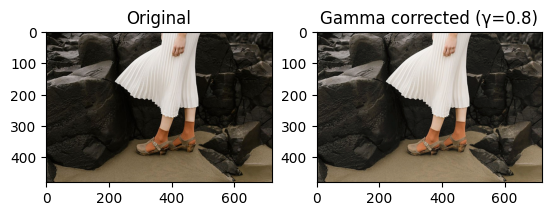

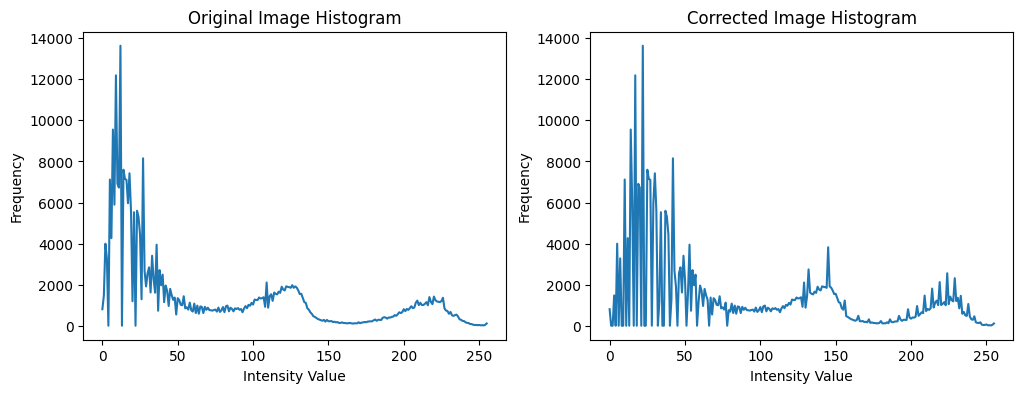

In [132]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
f = cv.imread('a1images/highlights_and_shadows.jpg')  # BGR image
lab = cv.cvtColor(f, cv.COLOR_BGR2LAB)
L, a, b = cv.split(lab)

# Normalize L to [0,1], apply gamma, then rescale back to [0,255]
L_float = L / 255.0
gamma = 0.8  # Gamma value for correction
L_corrected = np.power(L_float, gamma)
L_corrected = np.uint8(np.clip(L_corrected * 255.0, 0, 255))

# Merge and convert back to BGR
lab_corrected = cv.merge((L_corrected, a, b))
img_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)


hist, bins = np.histogram(L.ravel(), 256, [0, 256])
hist2, bins2 = np.histogram(L_corrected.ravel(), 256, [0, 256])

# Show result
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Gamma corrected (γ=0.8)")
plt.imshow(cv.cvtColor(img_corrected, cv.COLOR_BGR2RGB))
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(hist)
ax[0].set_title('Original Image Histogram')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(hist2)
ax[1].set_title('Corrected Image Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()


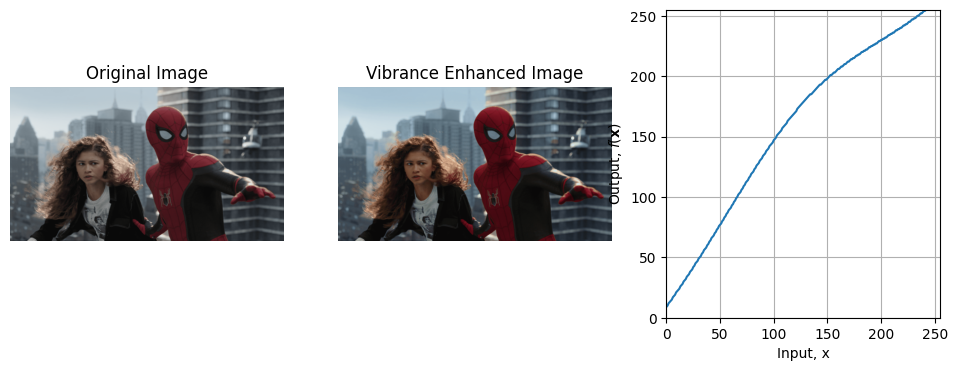

In [137]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read and convert
f = cv.imread('a1images/spider.png')  # BGR image
hsv = cv.cvtColor(f, cv.COLOR_BGR2HSV)
h, s, v = cv.split(hsv)

# Parameters
a = 0.4   # vibrance amount, in [0,1]
sigma = 70.0

# Transformation on saturation
S_transformed = s.astype(np.float32) + a * 128 * np.exp(-((s.astype(np.float32) - 128)**2) / (2 * sigma**2))
S_transformed = np.clip(S_transformed, 0, 255).astype(np.uint8)

# Merge back into HSV and convert to RGB
g = cv.merge((h, S_transformed, v))
g = cv.cvtColor(g, cv.COLOR_HSV2RGB)

# Show transformed color image
fig, ax = plt.subplots(1,3, figsize=(12, 4))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(g)
ax[1].set_title('Vibrance Enhanced Image')
ax[1].axis('off')

x_vals = np.arange(256, dtype=np.float32)
transform = x_vals + a * 128 * np.exp(-((x_vals - 128)**2) / (2 * sigma**2))
transform = np.clip(transform, 0, 255).astype(np.uint8)

ax[2].plot(transform)
ax[2].set_xlabel(r'Input, x')
ax[2].set_ylabel(r'Output, $f(\mathbf{x})$')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
plt.grid(True)

plt.show()



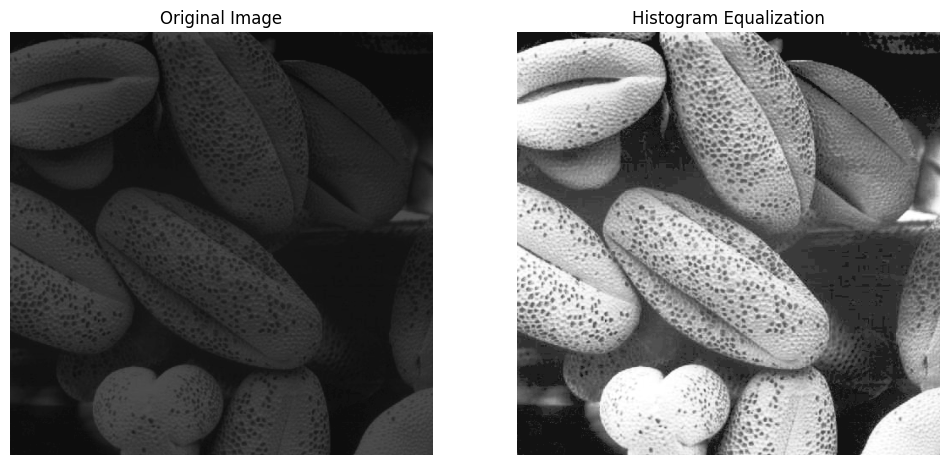

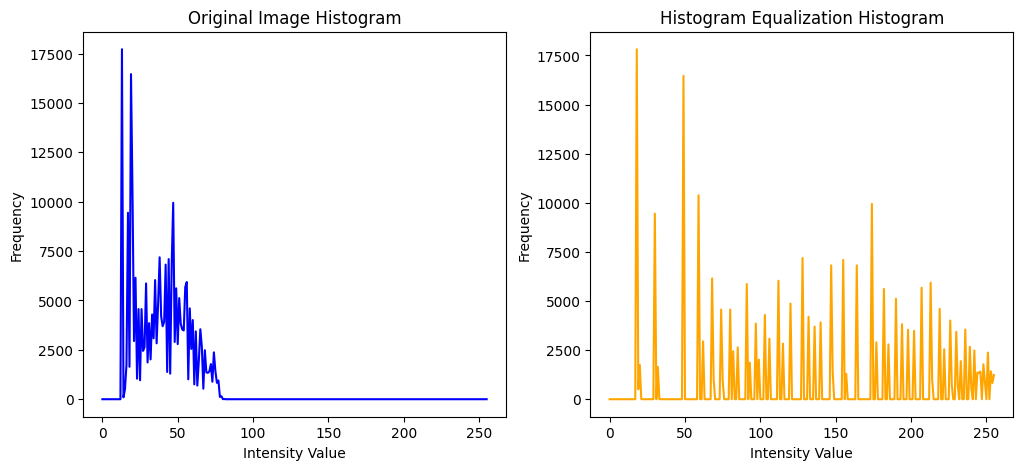

In [ ]:
# Do the Same Using a Hand-Computed Intensity Transfromation
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('a1images/shells.tif', cv.IMREAD_GRAYSCALE)
M, N = f.shape
L = 256
t = np.zeros(256, dtype=np.uint8)
hist, bins = np.histogram(f.ravel(), 256, [0, 256])
cdf = hist.cumsum()
cdf_min = cdf.min()
# Normalize CDF
cdf_normalized = (cdf - cdf_min) / (M*N - cdf_min)
t = np.round(cdf_normalized * (L - 1)).astype(np.uint8)

g = t[f]
hist2, bins2 = np.histogram(g.ravel(), 256, [0, 256])

fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Histogram Equalization')
ax[1].axis('off')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(hist, color='blue')
ax[0].set_title('Original Image Histogram')
ax[0].set_xlabel('Intensity Value')
ax[0].set_ylabel('Frequency')
ax[1].plot(hist2, color='orange')
ax[1].set_title('Histogram Equalization Histogram')
ax[1].set_xlabel('Intensity Value')
ax[1].set_ylabel('Frequency')
plt.show()

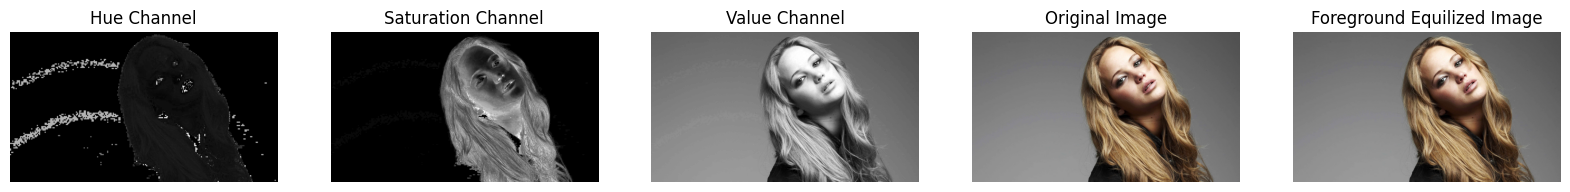

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('a1images/jeniffer.jpg')
f = cv.cvtColor(f, cv.COLOR_BGR2HSV)
M, N, _ = f.shape
L = 256
# Split HSV channels
h, s, v = cv.split(f)
# Everything above 11 make it 255, below 11 make it 0. (make mask)
threshold_value = 11
_, foreground_mask = cv.threshold(s, threshold_value, 255, cv.THRESH_BINARY)

# Extract foreground pixels only
foreground = cv.bitwise_and(v, v, mask=foreground_mask)

# Compute cumulative sum of the histogram and equalize using the equation
cdf = np.cumsum(hist)
t = np.array([(L-1) / (M*N) * cdf[k] for k in range(256)], dtype=np.uint8)
g = t[foreground]

#extract background pixels
background_mask = cv.bitwise_not(foreground_mask)
background = cv.bitwise_and(v, v, mask=background_mask)

#combine foreground and background
combined = cv.add(foreground, background)

#merge combine, h and s channels back to HSV
result = cv.merge((h, s, combined))

fig, ax = plt.subplots(1, 5, figsize=(20, 8))

ax[0].imshow(h, cmap='gray')
ax[0].set_title('Hue Channel')
ax[0].axis('off')

ax[1].imshow(s, cmap='gray')
ax[1].set_title('Saturation Channel')
ax[1].axis('off')

ax[2].imshow(v, cmap='gray')
ax[2].set_title('Value Channel')
ax[2].axis('off')

ax[3].imshow(cv.cvtColor(f, cv.COLOR_HSV2RGB))
ax[3].set_title('Original Image')
ax[3].axis('off')

ax[4].imshow(cv.cvtColor(result, cv.COLOR_HSV2RGB))
ax[4].set_title('Foreground Equilized Image')
ax[4].axis('off')

plt.show()

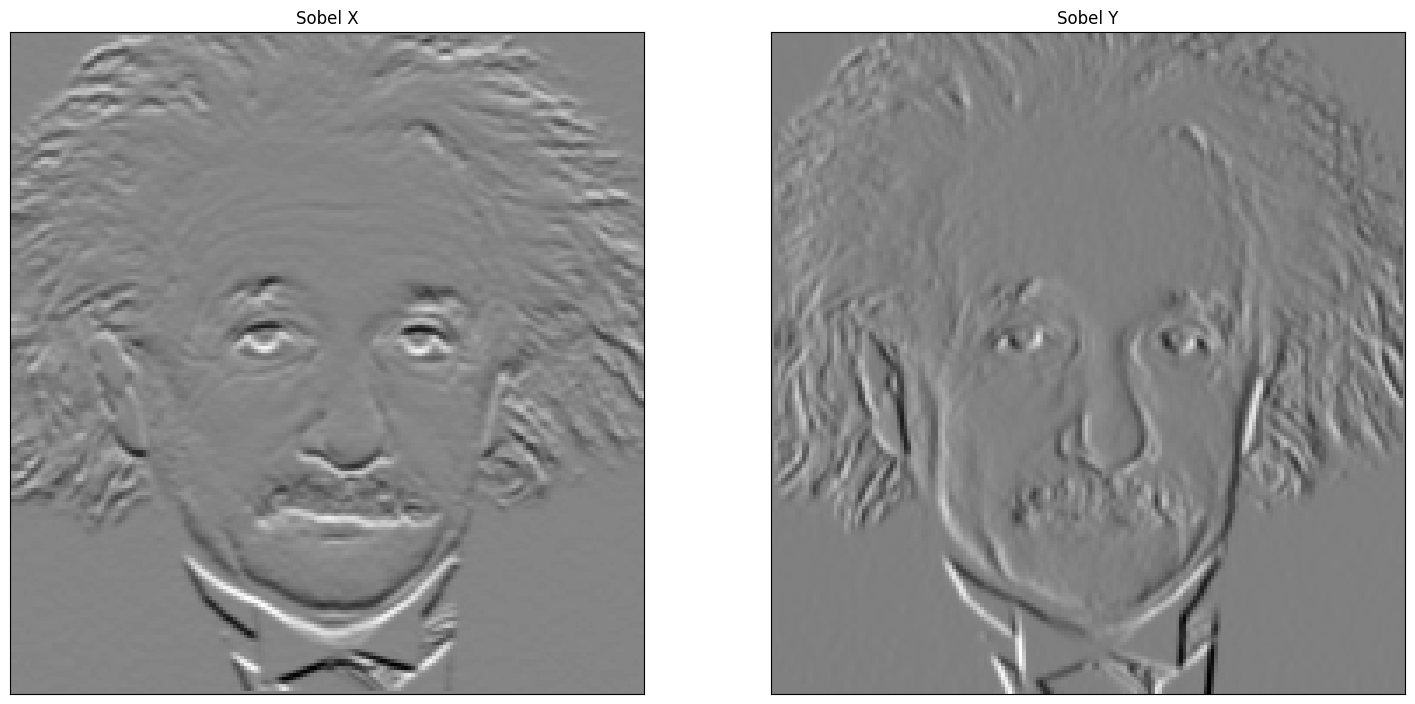

In [50]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

im = cv.imread('a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

im_x = cv.filter2D(im, cv.CV_64F, sobel_x)
im_y = cv.filter2D(im, cv.CV_64F, sobel_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im_x, cmap='gray')
ax[0].set_title('Sobel X')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im_y, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()


Text(0.5, 1.0, 'Sobel Y')

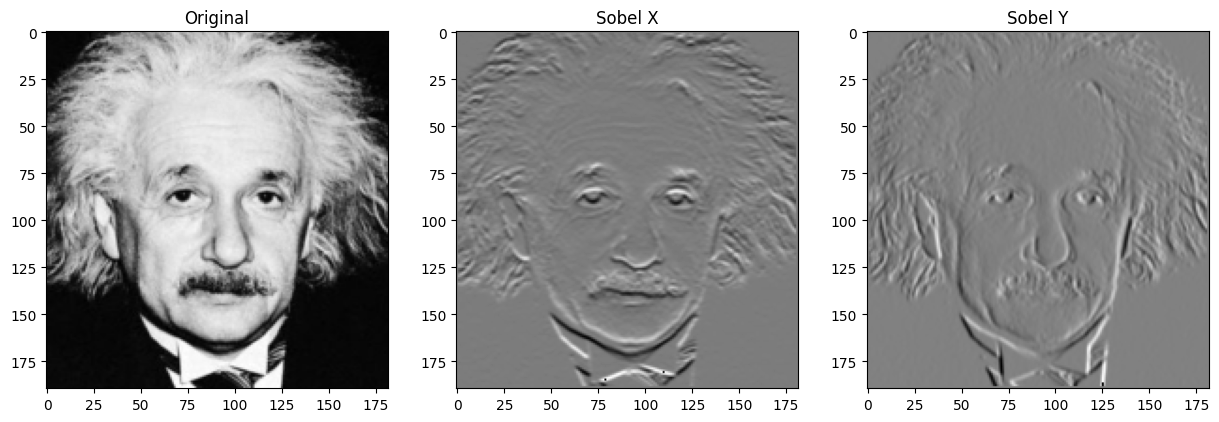

In [57]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math

def filter(image, kernel):
    assert kernel.shape[0] % 2 == 1 and kernel.shape[1] % 2 == 1
    k_hh, k_hw = kernel.shape[0] // 2, kernel.shape[1] // 2
    h, w = image.shape
    result = np.zeros((h, w), dtype=np.float32)

    for m in range(k_hh, h - k_hh):
        for n in range(k_hw, w - k_hw):
            region = image[m-k_hh:m+k_hh+1, n-k_hw:n+k_hw+1]
            result[m, n] = np.sum(region * kernel)

    # rescale to 0–255 for display
    result = cv.normalize(result, None, 0, 255, cv.NORM_MINMAX)
    return result.astype(np.uint8)
    
img = cv.imread('a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
f, axarr = plt.subplots(1,3, figsize=(15, 8))
axarr[0].imshow(img, cmap="gray")
axarr[0].set_title('Original')
kernel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype='float')
kernel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype='float')
imgx = filter(img, kernel_x)
imgx = imgx*255.0
imgx = imgx.astype(np.uint8)

imgy = filter(img, kernel_y)
imgy = imgy*255.0
imgy = imgy.astype(np.uint8)

axarr[1].imshow(imgx, cmap="gray")
axarr[1].set_title('Sobel X')

axarr[2].imshow(imgy, cmap="gray")
axarr[2].set_title('Sobel Y')


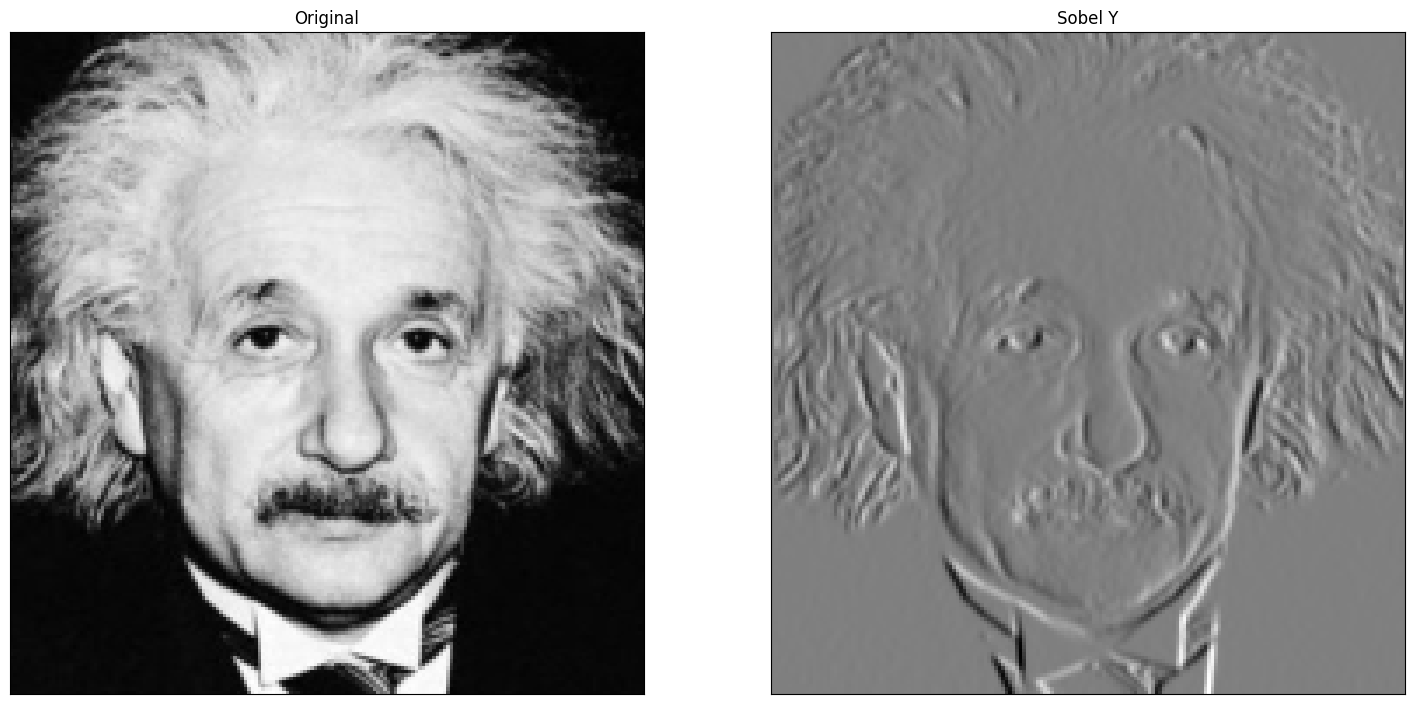

In [58]:
im = cv.imread('a1images/einstein.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert im is not None

sobel_hor_y = np.array([[1], [2], [1]])
sobel_hor_x = np.array([[1, 0, -1]])

im1 = cv.filter2D(im, cv.CV_64F, sobel_hor_x)
im2 = cv.filter2D(im1, cv.CV_64F, sobel_hor_y)

fig, ax  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(18,9))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(im2, cmap='gray')
ax[1].set_title('Sobel Y')
ax[1].set_xticks([]), ax[1].set_yticks([])
plt.show()

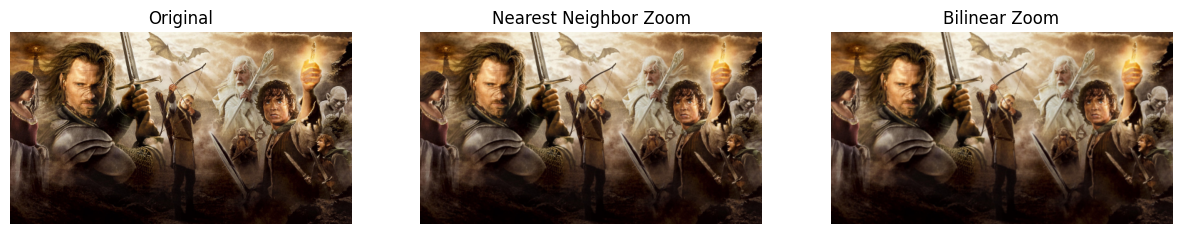

Original shape: (270, 480, 3)
Nearest zoom shape: (1080, 1920, 3)
Bilinear zoom shape: (1080, 1920, 3)


In [82]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom_image_cv2(img, s, method='nearest'):

    interp_map = {
        'nearest': cv2.INTER_NEAREST,
        'bilinear': cv2.INTER_LINEAR
    }
    interp = interp_map.get(method, cv2.INTER_LINEAR)
    zoomed_img = cv2.resize(img, None, fx=s, fy=s, interpolation=interp)
    return zoomed_img


# Load image (change path as needed)
img = cv2.imread('a1images/a1q5images/im01small.png')
# img = cv2.imread('a1images/a1q5images/taylor_very_small.jpg')  # Example image
if img is None:
    raise FileNotFoundError("Image file not found.")

# Zoom factor
s = 4

# Zoom with nearest neighbor
zoomed_nearest = zoom_image_cv2(img, s, method='nearest')

# Zoom with bilinear interpolation
zoomed_bilinear = zoom_image_cv2(img, s, method='bilinear')

# Show results
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Nearest Neighbor Zoom")
plt.imshow(cv2.cvtColor(zoomed_nearest, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Bilinear Zoom")
plt.imshow(cv2.cvtColor(zoomed_bilinear, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

cv2.imwrite('original_image.jpg', img)
cv2.imwrite('zoomed_nearest.jpg', zoomed_nearest)
cv2.imwrite('zoomed_bilinear.jpg', zoomed_bilinear)


print("Original shape:", img.shape)
print("Nearest zoom shape:", zoomed_nearest.shape)
print("Bilinear zoom shape:", zoomed_bilinear.shape)


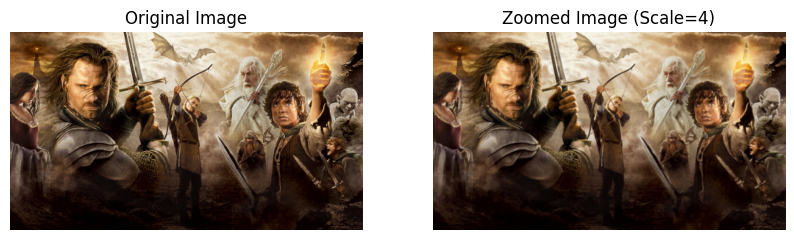

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load an image
img = cv.imread('a1images/a1q5images/im01small.png')

# Get image dimensions
height, width, channels = img.shape

def zoom_nearest(image, scale):
    height, width, channels = image.shape
    scale = int(round(scale))
    # Make new image with new dimensions
    new_height = int(height * scale)
    new_width = int(width * scale)
    zoomed_image = np.zeros((new_height, new_width, channels), dtype=image.dtype)

    # Loop over every pixel and replicate it
    for y in range(height):       # row
        for x in range(width):    # column
            zoomed_image[y*scale:(y+1)*scale, x*scale:(x+1)*scale] = image[y, x]

    return zoomed_image

def zoom_bilinear(image, scale):
    height, width, channels = image.shape
    new_height = int(height * scale)
    new_width = int(width * scale)

    zoomed_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    for y in range(new_height):
        for x in range(new_width):
            # Map the pixel in the new image to the original coordinates
            orig_x = x / scale
            orig_y = y / scale

            x0 = int(np.floor(orig_x))
            y0 = int(np.floor(orig_y))
            x1 = min(x0 + 1, width - 1)
            y1 = min(y0 + 1, height - 1)

            dx = orig_x - x0
            dy = orig_y - y0

            # Get the four neighboring pixels
            p00 = image[y0, x0].astype(np.float32)
            p10 = image[y0, x1].astype(np.float32)
            p01 = image[y1, x0].astype(np.float32)
            p11 = image[y1, x1].astype(np.float32)

            # Bilinear interpolation formula (averaging everything out)
            top = p00 * (1 - dx) + p10 * dx
            bottom = p01 * (1 - dx) + p11 * dx
            pixel = top * (1 - dy) + bottom * dy

            zoomed_image[y, x] = np.clip(pixel, 0, 255)

    return zoomed_image


# Zoom the image using nearest neighbor interpolation
scale = 4
zoomed_image = zoom_bilinear(img, scale)

cv.imwrite('zoomed_nearest.jpg', zoomed_image)

# Display the original and zoomed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"Zoomed Image (Scale={scale})")
plt.imshow(cv.cvtColor(zoomed_image, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


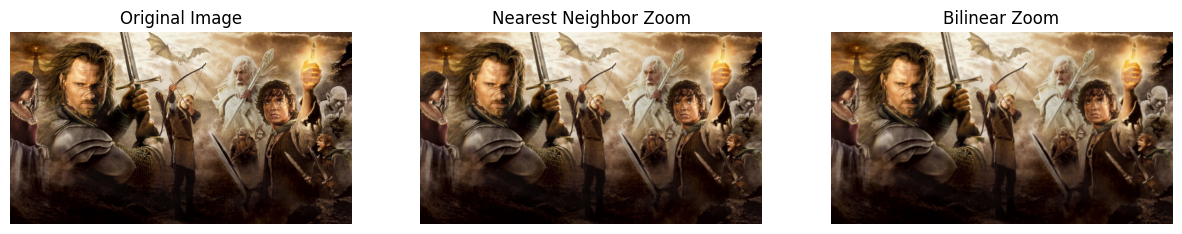

In [217]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def zoom_image(image, scale, method='nearest'):
    height, width, channels = image.shape
    scale = int(round(scale))  # Ensure integer scaling
    new_height = int(height * scale)
    new_width = int(width * scale)
    
    zoomed_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)

    if method.lower() == 'nearest':
        # Nearest neighbor: just replicate pixels
        for y in range(height):
            for x in range(width):
                zoomed_image[y*scale:(y+1)*scale, x*scale:(x+1)*scale] = image[y, x]

    elif method.lower() == 'bilinear':
        # Bilinear interpolation
        for y in range(new_height):
            for x in range(new_width):
                orig_x = x / scale
                orig_y = y / scale

                x0 = int(np.floor(orig_x))
                y0 = int(np.floor(orig_y))
                x1 = min(x0 + 1, width - 1)
                y1 = min(y0 + 1, height - 1)

                dx = orig_x - x0
                dy = orig_y - y0

                p00 = image[y0, x0].astype(np.float32)
                p10 = image[y0, x1].astype(np.float32)
                p01 = image[y1, x0].astype(np.float32)
                p11 = image[y1, x1].astype(np.float32)

                top = p00 * (1 - dx) + p10 * dx
                bottom = p01 * (1 - dx) + p11 * dx
                pixel = top * (1 - dy) + bottom * dy

                zoomed_image[y, x] = np.clip(pixel, 0, 255)
    else:
        raise ValueError("method must be 'nearest' or 'bilinear'")

    return zoomed_image

img = cv.imread('a1images/a1q5images/im01small.png')

zoom_nn = zoom_image(img, 4, method='nearest')
zoom_bl = zoom_image(img, 4, method='bilinear')

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')
cv.imwrite('original_image.jpg', img)

ax[1].imshow(cv.cvtColor(zoom_nn, cv.COLOR_BGR2RGB))
ax[1].set_title("Nearest Neighbor Zoom")
ax[1].axis('off')
cv.imwrite('zoomed_nearest.jpg', zoom_nn)

ax[2].imshow(cv.cvtColor(zoom_bl, cv.COLOR_BGR2RGB))
ax[2].set_title("Bilinear Zoom")
ax[2].axis('off')  
cv.imwrite('zoomed_bilinear.jpg', zoom_bl) 


plt.show()

In [219]:
#measuring the ssd

def normalized_ssd(img1, img2):
    # Ensure both are float for computation
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    
    # Compute sum of squared differences
    ssd = np.sum((img1 - img2) ** 2)
    
    # Normalize by number of pixels
    norm_ssd = ssd / img1.size
    return norm_ssd

# Load the small image (low-res)
small_img = cv.imread('a1images/a1q5images/im01small.png')
# Load the high-res version (ground truth)
original_img = cv.imread('a1images/a1q5images/im01.png')

# Zoom image
zoomed_img = zoom_image(small_img, 3, method='bilinear') 
# zoomed_img = zoom_image(small_img, 3, method='nearest') 

if zoomed_img.shape != original_img.shape:
    original_img = cv.resize(original_img, (zoomed_img.shape[1], zoomed_img.shape[0]))

# Compute Normalized SSD
score = normalized_ssd(zoomed_img, original_img)
print(f"Normalized SSD: {score}")


Normalized SSD: 158.1489529035208


Need to check the SSD of them

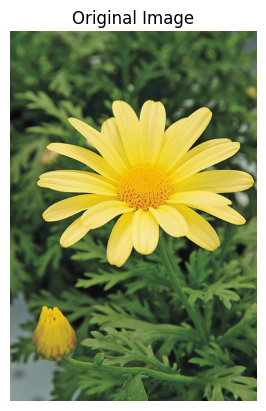

In [227]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv.imread('a1images/daisy.jpg', cv.IMREAD_COLOR_RGB)  # change to your path


plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()


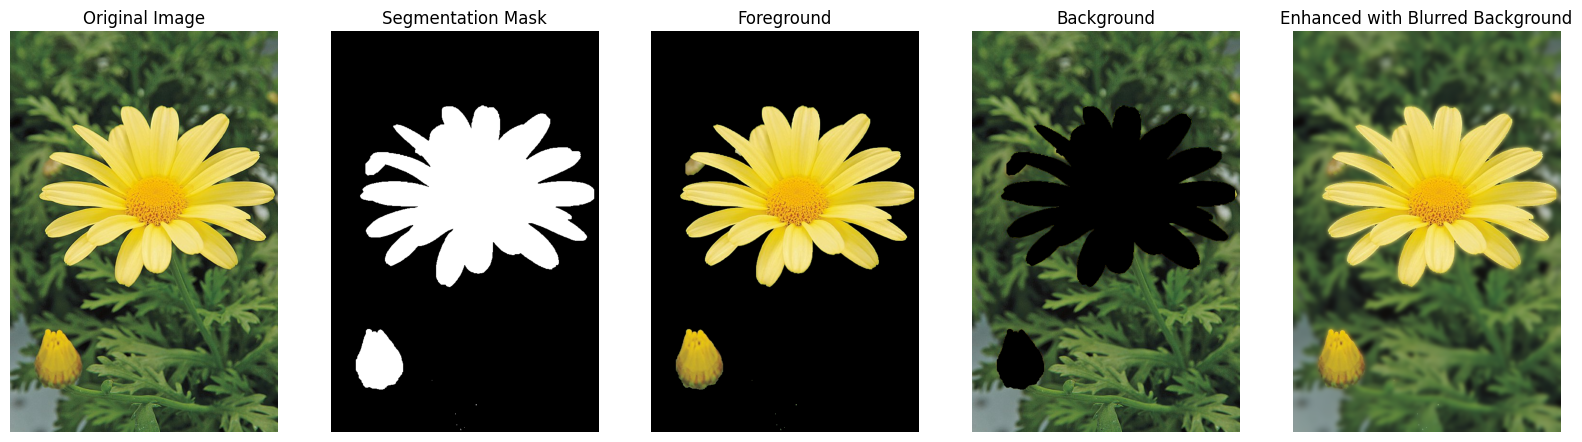

In [ ]:
# Create mask and models
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Rectangle around the flower (adjust coordinates)
rect = (50, 100, img.shape[1]-60, img.shape[0]-100)

# Run grabCut
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Convert mask to binary (0 = background, 1 = foreground)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract foreground
foreground = img * mask2[:, :, np.newaxis]

# Extract background
background = img * (1 - mask2[:, :, np.newaxis])

# Blur the whole image
blurred = cv2.GaussianBlur(img, (25, 25), 0)

# Combine blurred background with sharp foreground
enhanced = blurred * (1 - mask2[:, :, np.newaxis]) + foreground

# Create mask and models
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Rectangle around the flower (adjust coordinates)
rect = (50, 100, img.shape[1]-60, img.shape[0]-100)

# Run grabCut
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# Convert mask to binary (0 = background, 1 = foreground)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract foreground
foreground = img * mask2[:, :, np.newaxis]

# Extract background
background = img * (1 - mask2[:, :, np.newaxis])

# Blur the whole image
blurred = cv2.GaussianBlur(img, (25, 25), 0)

# Combine blurred background with sharp foreground
enhanced = blurred * (1 - mask2[:, :, np.newaxis]) + foreground


# Show original vs enhanced
fig, ax = plt.subplots(1, 5, figsize=(20, 8))

ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(mask2, cmap='gray')
ax[1].set_title("Segmentation Mask")
ax[1].axis('off')

ax[2].imshow(foreground)
ax[2].set_title("Foreground")
ax[2].axis('off')

ax[3].imshow(background)
ax[3].set_title("Background")
ax[3].axis('off')

ax[4].imshow(enhanced.astype(np.uint8))
ax[4].set_title("Enhanced with Blurred Background")
ax[4].axis('off')

plt.show()